## Assignment 2 Randomized Optimization

This notebook contains all the work for assignment 2. The notebook will create all the graphs in a graph folder in the current directory. Please make sure you create a graphs directory prior to running the notebook. 

In [1]:
import numpy as np 
import mlrose_hiive
import matplotlib.pyplot as plt
import time
from random import randint
import warnings
import seaborn as sns
import dataframe_image as dfi


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


import timeit, functools





from sklearn.neural_network import MLPClassifier


sns.set()

np.random.seed(69)

Duplicate key in file '/Users/naziultalukder/.matplotlib/matplotlibrc', line 2 ('backend: PyQt5')
Duplicate key in file '/Users/naziultalukder/.matplotlib/matplotlibrc', line 3 ('backend: TkAgg')


In [2]:
def analyze_problem_size(problem_type):
    print("what is problem type ", problem_type)
    np.random.seed(69)

    fitness_simulated_annealing = []
    fitness_random_hill_climb = []
    fitness_genetic_algorithm = []
    fitness_mimic = []

    time_simulated_annealing = []
    time_random_hill_climb = []
    time_genetic_algorithm = []
    time_mimic = []
    
    length_range = range(5,200,40)

    max_attempts = 100
    max_iters = 1000
    
    if int(problem_type) == int(1):
        fitness = mlrose_hiive.ContinuousPeaks(t_pct = 0.1)

        fitness_graph = 'graphs/continuous_peaks_fitness.png'
        time_graph = 'graphs/continuous_peaks_time.png'
        prob_name = 'Continuous Peaks'
    if int(problem_type) == int(2):
        fitness = mlrose_hiive.FlipFlop()

        fitness_graph = 'graphs/flip_flop_fitness.png'
        time_graph = 'graphs/flip_flop_time.png'
        prob_name = 'Flip Flop'

    if int(problem_type) == int(3):
        fitness = mlrose_hiive.FourPeaks(t_pct = 0.1)

        fitness_graph = 'graphs/four_peaks_fitness.png'
        time_graph = 'graphs/four_peaks_time.png'
        prob_name = 'Four Peaks'


    for value in length_range:
        problem = mlrose_hiive.DiscreteOpt(length = value, fitness_fn = fitness, maximize = True, max_val = 2)
        problem.set_mimic_fast_mode(True)
        
        
        init_state = np.random.randint(2, size = value)
        start = time.time()
        _, best_fitness_sa, _ = mlrose_hiive.simulated_annealing(problem, schedule = mlrose_hiive.ExpDecay(), max_attempts = max_attempts, max_iters = max_iters, init_state = init_state, curve = True)
        end = time.time()
        sa_time = end - start
        print("SA time:", sa_time)

        start = time.time()
        _, best_fitness_rhc, _ = mlrose_hiive.random_hill_climb(problem, max_attempts = max_attempts, max_iters = max_iters, init_state = init_state, curve = True)
        end = time.time()
        rhc_time = end - start
        print("RHC time:", rhc_time)

        start = time.time()
        _, best_fitness_ga, _ = mlrose_hiive.genetic_alg(problem, max_attempts = max_attempts, max_iters = max_iters, curve = True)
        end = time.time()
        ga_time = end - start
        print("GA time:", ga_time)

        start = time.time()
        _, best_fitness_mimic, _ = mlrose_hiive.mimic(problem, pop_size = 500, max_attempts = max_attempts, max_iters = max_iters, curve = True)
        end = time.time()
        mimic_time = end - start
        print("MIMIC time:", mimic_time)

        fitness_simulated_annealing.append(best_fitness_sa)
        fitness_random_hill_climb.append(best_fitness_rhc)
        fitness_genetic_algorithm.append(best_fitness_ga)
        fitness_mimic.append(best_fitness_mimic)

        time_simulated_annealing.append(sa_time)
        time_random_hill_climb.append(rhc_time)
        time_genetic_algorithm.append(ga_time)
        time_mimic.append(mimic_time)


        print('Done with Iteration', value)
        print('-' * 80)

    fitness_simulated_annealing = np.array(fitness_simulated_annealing)
    fitness_random_hill_climb = np.array(fitness_random_hill_climb)
    fitness_genetic_algorithm = np.array(fitness_genetic_algorithm)
    fitness_mimic = np.array(fitness_mimic)

    time_simulated_annealing = np.array(time_simulated_annealing)
    time_random_hill_climb = np.array(time_random_hill_climb)
    time_genetic_algorithm = np.array(time_genetic_algorithm)
    time_mimic = np.array(time_mimic)
    
    plt.figure(figsize= (10,6))
    plt.subplot(121)    
    plt.plot(length_range, fitness_simulated_annealing, label = 'Simulated Annealing')
    plt.plot(length_range, fitness_random_hill_climb, label = 'Randomized Hill Climb')
    plt.plot(length_range, fitness_genetic_algorithm, label = 'Genetic Algorithm')
    plt.plot(length_range, fitness_mimic, label = 'MIMIC')
    plt.title(f'Fitness vs. Problem Size - {prob_name}')
    plt.xlabel('Problem Size')
    plt.ylabel('Fitness')
    plt.legend()
    
    plt.subplot(122)    
    plt.plot(length_range, time_simulated_annealing, label = 'Simulated Annealing')
    plt.plot(length_range, time_random_hill_climb, label = 'Randomized Hill Climb')
    plt.plot(length_range, time_genetic_algorithm, label = 'Genetic Algorithm')
    plt.plot(length_range, time_mimic, label = 'MIMIC')
    plt.title(f'Time Efficiency vs. Problem Size - {prob_name}')
    plt.legend()
    plt.xlabel('Problem Size')
    plt.ylabel('Computation Time (s)')
    plt.savefig(fitness_graph)


In [3]:
def analyze_problem_size_wrapper():
    for i in range(3):
        print(i+1)
        analyze_problem_size(i+1)

In [4]:
def fit_curve(problem_type):
    if int(problem_type) == int(1):
        fitness = mlrose_hiive.ContinuousPeaks(t_pct = 0.1)
        fitness_graph = 'graphs/continuous_peaks_curve.png'
        prob_name = 'Continuous Peaks'
    if int(problem_type) == int(2):
        fitness = mlrose_hiive.FlipFlop()
        fitness_graph = 'graphs/flip_flop_curve.png'
        time_graph = 'graphs/flip_flop_time.png'
        prob_name = 'Flip Flop'

    if int(problem_type) == int(3):
        fitness = mlrose_hiive.FourPeaks(t_pct = 0.1)
        fitness_graph = 'graphs/four_peaks_curve.png'
        prob_name = 'Four Peaks'
        
    problem_length = 100
    run_time = []
    problem = mlrose_hiive.DiscreteOpt(length = problem_length, fitness_fn = fitness, maximize = True, max_val = 2)
    problem.set_mimic_fast_mode(True)
    init_state = np.random.randint(2, size = problem_length)
    start = time.time()
    _, _, fitness_curve_sa = mlrose_hiive.simulated_annealing(problem, schedule = mlrose_hiive.ExpDecay(), max_attempts = 1000000, max_iters = 7000, init_state = init_state, curve = True)
    end = time.time()
    run_time.append((end - start))

    print("Done with SA iterations!", (end - start))

    start = time.time()
    _, _, fitness_curve_rhc = mlrose_hiive.random_hill_climb(problem, max_attempts = 1000000, max_iters = 7000, init_state = init_state, curve = True)
    end = time.time()
    run_time.append((end - start))


    print("Done with RHC iterations!", (end - start))

    start = time.time()
    _, _, fitness_curve_ga = mlrose_hiive.genetic_alg(problem, pop_size = 500, max_attempts = 1000, max_iters = 7000, curve = True)
    # _, _, fitness_curve_ga = mlrose_hiive.genetic_alg(problem, pop_size = 500, max_attempts = 10, max_iters = 7000, curve = True)

    end = time.time()
    run_time.append((end - start))

    print("Done with GA iterations!", (end - start))

    start = time.time()
    _, _, fitness_curve_mimic = mlrose_hiive.mimic(problem, pop_size = 500, max_attempts = 200, max_iters = 1000, curve = True)
    # _, _, fitness_curve_mimic = mlrose_hiive.mimic(problem, pop_size = 500, max_attempts = 20, max_iters = 1000, curve = True)
    end = time.time()
    run_time.append((end - start))

    print("Done with MIMIC iterations!", (end - start))
    
    plt.figure(figsize= (12,8))
    plt.subplot(121)
    plt.plot(fitness_curve_sa[:,0], label = 'Simulated Annealing')
    plt.plot(fitness_curve_rhc[:,0], label = 'Randomized Hill Climb')
    plt.plot(fitness_curve_ga[:,0], label = 'Genetic Algorithm')
    plt.plot(fitness_curve_mimic[:,0], label = 'MIMIC')
    plt.title(f'Fitness Curve - {prob_name}')
    plt.legend()
    plt.xlabel('Iterations')
    plt.ylabel('Fitness')
    
    plt.subplot(122)
    plt.plot(fitness_curve_sa[:,1], label = 'Simulated Annealing')
    plt.plot(fitness_curve_rhc[:,1], label = 'Randomized Hill Climb')
    plt.plot(fitness_curve_ga[:,1], label = 'Genetic Algorithm')
    plt.plot(fitness_curve_mimic[:,1], label = 'MIMIC')
    plt.title(f'Function Evaluation Curve - {prob_name}')
    plt.legend()
    plt.xlabel('Max Attempts')
    plt.ylabel('Number of Evaluations')
    plt.savefig(fitness_graph)
    
    return run_time



In [5]:
def fit_curve_wrapper():
    time_continuous_peaks = fit_curve(1)
    time_flip_flop = fit_curve(2)
    time_four_peaks = fit_curve(3)
    data = {'ContinuousPeaks': time_continuous_peaks, 'FlipFlop': time_flip_flop, 'FourPeaks': time_four_peaks}
    df_time = pd.DataFrame.from_dict(data, orient='index',
                           columns=['SA', 'RHC', 'GA', 'MIMIC'])
    dfi.export(df_time, 'graphs/curve_time.png')


In [6]:
cancer_data = pd.read_csv('cancer_data.csv')

cancer_data.drop('id',axis=1,inplace=True)
cancer_data.drop('Unnamed: 32',axis=1,inplace=True)

cancer_data['diagnosis'] = cancer_data['diagnosis'].map({'M':1,'B':0})

X_canc = cancer_data.drop(['diagnosis'], axis=1)
y_canc = cancer_data['diagnosis']

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_canc, y_canc, test_size=0.20, random_state=42)
X_train_main_c, X_validation_c, y_train_main_c, y_validation_c = \
train_test_split(X_train_c, y_train_c, test_size = 0.25, random_state = 42)


In [7]:
def get_scores_nn_ga(iter_num, attempt_num, pop=200):
    nn_model2 = mlrose_hiive.NeuralNetwork(hidden_nodes = [1], activation = 'identity', 
                                     algorithm = 'genetic_alg', 
                                     max_iters = iter_num, bias = True, is_classifier = True, 
                                     learning_rate = 0.0001, early_stopping = True, 
                                     clip_max = 5, max_attempts = attempt_num, random_state = 42, pop_size = pop)

    nn_model2.fit(X_train_main_c, y_train_main_c)
    
    y_train_pred = nn_model2.predict(X_train_main_c)
    y_train_acc = accuracy_score(y_train_main_c, y_train_pred)
    
    
    y_val_pred = nn_model2.predict(X_validation_c)
    y_val_acc = accuracy_score(y_validation_c, y_val_pred)
    return y_train_acc, y_val_acc




In [8]:
def nn_ga_attempt():
    nums = np.linspace(1, 10, 10)

    train_acc = []
    val_acc = []


    for num in nums:
        train, val = get_scores_nn_ga(20, num)
        train_acc.append(train)
        val_acc.append(val)

    return train_acc, val_acc, nums

In [9]:
def plot_nn_ga_attempt(train, val, nums):
    plt.subplot(141)

    plt.plot(nums, train, label='Training')
    plt.plot(nums, val, label='Validation')

    
    plt.xlabel('Max Attempts')
    plt.ylabel('Accuracy Score')
    plt.title('Attempts in Iteration (GA)')
    plt.legend()

In [10]:
def nn_ga_population():
    x_data = np.array([])
    scores = np.array([])
    for i in range(25,100,1):
        x_data = np.append(x_data, i)
        _, val_scores = get_scores_nn_ga(5, 5, i)
        scores = np.append(scores, val_scores)
    
    return x_data, scores
    

In [11]:
def plot_ga_pp(x_data, scores):    
    plt.subplot(142)
    scores_min = scores - scores.std()
    scores_max = scores + scores.std()
    
    plt.plot(x_data, scores, label='Validation')
    plt.fill_between(x_data, scores_min, scores_max, color='blue',
                     alpha=0.1)
    
    plt.xlabel('Population Size')
    plt.ylabel('Accuracy Score')
    plt.title('Population (GA)')
    plt.legend()
    
    

In [12]:
def get_scores_nn_sa(iter_num=60_000, schedule=mlrose_hiive.GeomDecay()):
    nn_model2 = mlrose_hiive.NeuralNetwork(hidden_nodes = [1], activation = 'identity', 
                                     algorithm = 'simulated_annealing', schedule = schedule,
                                     max_iters = iter_num, bias = True, is_classifier = True, 
                                     learning_rate = 0.0001, early_stopping = True, 
                                     clip_max = 100, max_attempts = 1000, random_state = 42)
    nn_model2.fit(X_train_main_c, y_train_main_c)
    
    y_train_pred = nn_model2.predict(X_train_main_c)
    y_train_acc = accuracy_score(y_train_main_c, y_train_pred)
    
    
    y_val_pred = nn_model2.predict(X_validation_c)
    y_val_acc = accuracy_score(y_validation_c, y_val_pred)
    return y_train_acc, y_val_acc




In [13]:
def nn_sa_max_iter():
    x_data = np.array([])
    scores = np.array([])
    train_scores = np.array([])
    for i in range(10_000, 70_000, 10_000):
        train, val_scores = get_scores_nn_sa(i)
        scores = np.append(scores, val_scores)
        train_scores = np.append(train_scores, train)
        x_data = np.append(x_data, i)
    
    return x_data, train_scores, scores
    

In [14]:
def plot_sa_iter(x_data, train, scores):
    plt.subplot(143)
    plt.title('SA')
    plt.plot(x_data, train, label='Training')
    plt.plot(x_data, scores, label='Validation')
    
    plt.xlabel('Max Iterations')
    plt.ylabel('Accuracy Score')
    plt.legend()
    

In [15]:
def get_scores_nn_rhc(iter_num=100_000, restart = 0):
    nn_model2 = mlrose_hiive.NeuralNetwork(hidden_nodes = [1], activation = 'identity', 
                                     algorithm = 'random_hill_climb', restarts = restart,
                                     max_iters = iter_num, bias = True, is_classifier = True, 
                                     learning_rate = 0.0001, early_stopping = True, 
                                     clip_max = 5, max_attempts = 1000, random_state = 42)
    nn_model2.fit(X_train_main_c, y_train_main_c)
    
    y_train_pred = nn_model2.predict(X_train_main_c)
    y_train_acc = accuracy_score(y_train_main_c, y_train_pred)
    
    
    y_val_pred = nn_model2.predict(X_validation_c)
    y_val_acc = accuracy_score(y_validation_c, y_val_pred)
    return y_train_acc, y_val_acc


In [16]:
def nn_rhc_max_iter():
    x_data = np.array([])
    scores = np.array([])
    train_scores = np.array([])
    for i in range(10_000, 110_000, 10_000):
        train, val_scores = get_scores_nn_rhc(i)
        scores = np.append(scores, val_scores)
        train_scores = np.append(train_scores, train)
        x_data = np.append(x_data, i)
    
    return x_data, train_scores, scores
    

In [17]:
def plot_rhc_iter(x_data, train, scores):
    plt.subplot(144)
    plt.title('RHC')
    plt.plot(x_data, train, label='Training')
    plt.plot(x_data, scores, label='Validation')
    plt.xlabel('Maximum Iterations')
    plt.ylabel('Accuracy Score')
    plt.legend()
    

In [18]:
def plot_hp():
    plt.figure(figsize=(20,6))
    
    train, val, nums = nn_ga_attempt()
    x_data, scores = nn_ga_population()
    
    plot_nn_ga_attempt(train, val, nums)
    plot_ga_pp(x_data, scores)
    
    
    x_data, train, scores = nn_sa_max_iter()
    plot_sa_iter(x_data, train, scores)
    
    x, train, score = nn_rhc_max_iter()
    plot_rhc_iter(x, train, score)
    plt.savefig('graphs/hp_tuning.png')
    
    
    
    

In [19]:
def get_performance():

    train = []
    loss = []
    train_acc = []
    val_acc = []
    confusion_dict = {'gd': [], 'ga': [], 'sa': [], 'rhc': []}

    best_gd = mlrose_hiive.NeuralNetwork(hidden_nodes = [1], activation = 'identity', 
                                     algorithm = 'gradient_descent',
                                     max_iters = 15000, bias = True, is_classifier = True, 
                                     learning_rate = 0.000001, early_stopping = True, 
                                     clip_max = 5, max_attempts = 1000, random_state = 42, curve=True)
    best_ga = mlrose_hiive.NeuralNetwork(hidden_nodes = [1], activation = 'identity', 
                                         algorithm = 'genetic_alg', 
                                         max_iters = 20, bias = True, is_classifier = True, 
                                         learning_rate = 0.0001, early_stopping = True, 
                                         clip_max = 5, max_attempts = 10, random_state = 42, pop_size = 75, curve=True)

    best_sa = mlrose_hiive.NeuralNetwork(hidden_nodes = [1], activation = 'identity', 
                                         algorithm = 'simulated_annealing',
                                         max_iters = 60_000, bias = True, is_classifier = True, 
                                         learning_rate = 0.01, early_stopping = True, 
                                         clip_max = 100, max_attempts = 100, random_state = 42, curve=True)
    best_rhc = mlrose_hiive.NeuralNetwork(hidden_nodes = [1], activation = 'identity', 
                                         algorithm = 'random_hill_climb',
                                         max_iters = 100_000, bias = True, is_classifier = True, 
                                         learning_rate = 0.0001, early_stopping = True, 
                                         clip_max = 5, max_attempts = 1000, random_state = 42, curve=True)
    
    gd_train = timeit.timeit(functools.partial(best_gd.fit, X_train_main_c, y_train_main_c), number=1)
    best_gd.fit(X_train_main_c, y_train_main_c)
    loss.append(best_gd.loss)
    y_train_pred = best_gd.predict(X_train_main_c)
    y_train_acc = accuracy_score(y_train_main_c, y_train_pred)
    y_val_pred = best_gd.predict(X_validation_c)
    y_val_acc = accuracy_score(y_validation_c, y_val_pred)
    train_acc.append(y_train_acc)
    val_acc.append(y_val_acc)
    confusion_dict['gd'] = confusion_matrix(y_validation_c, y_val_pred)
    train.append(gd_train)


    ga_train = timeit.timeit(functools.partial(best_ga.fit, X_train_main_c, y_train_main_c), number=1)
    best_ga.fit(X_train_main_c, y_train_main_c)
    loss.append(best_ga.loss)
    y_train_pred = best_ga.predict(X_train_main_c)
    y_train_acc = accuracy_score(y_train_main_c, y_train_pred)
    y_val_pred = best_ga.predict(X_validation_c)
    y_val_acc = accuracy_score(y_validation_c, y_val_pred)
    train_acc.append(y_train_acc)
    val_acc.append(y_val_acc)
    confusion_dict['ga'] = confusion_matrix(y_validation_c, y_val_pred)
    train.append(ga_train)



    sa_train = timeit.timeit(functools.partial(best_sa.fit, X_train_main_c, y_train_main_c), number=1)
    best_sa.fit(X_train_main_c, y_train_main_c)
    loss.append(best_sa.loss)
    y_train_pred = best_sa.predict(X_train_main_c)
    y_train_acc = accuracy_score(y_train_main_c, y_train_pred)
    y_val_pred = best_sa.predict(X_validation_c)
    y_val_acc = accuracy_score(y_validation_c, y_val_pred)
    train_acc.append(y_train_acc)
    val_acc.append(y_val_acc)
    confusion_dict['sa'] = confusion_matrix(y_validation_c, y_val_pred)
    train.append(sa_train)


    rhc_train = timeit.timeit(functools.partial(best_rhc.fit, X_train_main_c, y_train_main_c), number=1)
    best_rhc.fit(X_train_main_c, y_train_main_c)
    loss.append(best_rhc.loss)
    y_train_pred = best_rhc.predict(X_train_main_c)
    y_train_acc = accuracy_score(y_train_main_c, y_train_pred)
    y_val_pred = best_rhc.predict(X_validation_c)
    y_val_acc = accuracy_score(y_validation_c, y_val_pred)
    train_acc.append(y_train_acc)
    val_acc.append(y_val_acc)
    confusion_dict['rhc'] = confusion_matrix(y_validation_c, y_val_pred)
    train.append(rhc_train)
    
    
    ## plot confusion matrix
    df_cm_gd = pd.DataFrame(confusion_dict['gd'], index = [i for i in ['Cancer(actual)', 'No Cancer(actual)']],
                  columns = [i for i in ['Cancer', 'No Cancer']])
    df_cm_ga = pd.DataFrame(confusion_dict['ga'], index = [i for i in ['Cancer(actual)', 'No Cancer(actual)']],
                      columns = [i for i in ['Cancer', 'No Cancer']])
    df_cm_sa = pd.DataFrame(confusion_dict['sa'], index = [i for i in ['Cancer(actual)', 'No Cancer(actual)']],
                      columns = [i for i in ['Cancer', 'No Cancer']])
    df_cm_rhc = pd.DataFrame(confusion_dict['rhc'], index = [i for i in ['Cancer(actual)', 'No Cancer(actual)']],
                      columns = [i for i in ['Cancer', 'No Cancer']])

    fig, axes = plt.subplots(1, 4, figsize=(20,6))
    sns.set(font_scale=1.4) # for label size

    sns.heatmap(df_cm_gd, annot=True, ax = axes[0])
    sns.heatmap(df_cm_ga, annot=True, ax = axes[1])
    sns.heatmap(df_cm_sa, annot=True, ax = axes[2])
    sns.heatmap(df_cm_rhc, annot=True, ax = axes[3])
    
    axes[0].set_title('Backprop')
    axes[1].set_title('GA')
    axes[2].set_title('SA')
    axes[0].set_title('RHC')
    
    plt.savefig('graphs/cm.png')
    
    return train, loss, train_acc, val_acc


In [20]:
def plot_results(train_acc, val_acc, time, loss):
    plt.figure(figsize=(15,6))
    
    plt.subplot(131)
    x_axis = ['Backprop', 'GA', 'SA', 'RHC']
    plt.title('Training Time')
    plt.scatter(x_axis, time)
    plt.xlabel('Algorithms')
    plt.ylabel('Time (s)')
    
    plt.subplot(132)
    plt.title('Minimized Loss')
    plt.scatter(x_axis, loss)
    plt.xlabel('Algorithms')
    plt.ylabel('Minimized Loss')
    
    plt.subplot(133)
    plt.title('Performance')
    plt.scatter(x_axis, train_acc, label = 'Training')
    plt.scatter(x_axis, val_acc, label = 'Validation')
    plt.xlabel('Algorithms')
    plt.ylabel('Accuracy Score')
    plt.legend()
    plt.savefig('graphs/performance.png')

In [21]:
def test_performance():
    best_gd = mlrose_hiive.NeuralNetwork(hidden_nodes = [1], activation = 'identity', 
                                     algorithm = 'gradient_descent',
                                     max_iters = 15000, bias = True, is_classifier = True, 
                                     learning_rate = 0.000001, early_stopping = True, 
                                     clip_max = 5, max_attempts = 1000, random_state = 42, curve=True)
    best_ga = mlrose_hiive.NeuralNetwork(hidden_nodes = [1], activation = 'identity', 
                                         algorithm = 'genetic_alg', 
                                         max_iters = 20, bias = True, is_classifier = True, 
                                         learning_rate = 0.0001, early_stopping = True, 
                                         clip_max = 5, max_attempts = 10, random_state = 42, pop_size = 75, curve=True)

    best_sa = mlrose_hiive.NeuralNetwork(hidden_nodes = [1], activation = 'identity', 
                                         algorithm = 'simulated_annealing',
                                         max_iters = 60_000, bias = True, is_classifier = True, 
                                         learning_rate = 0.01, early_stopping = True, 
                                         clip_max = 100, max_attempts = 100, random_state = 42, curve=True)
    best_rhc = mlrose_hiive.NeuralNetwork(hidden_nodes = [1], activation = 'identity', 
                                         algorithm = 'random_hill_climb',
                                         max_iters = 100_000, bias = True, is_classifier = True, 
                                         learning_rate = 0.0001, early_stopping = True, 
                                         clip_max = 5, max_attempts = 1000, random_state = 42, curve=True)

    test_acc = []
    train_acc = []
    best_gd.fit(X_train_main_c, y_train_main_c)
    y_train_pred = best_gd.predict(X_train_main_c)
    y_train_acc = accuracy_score(y_train_main_c, y_train_pred)
    y_val_pred = best_gd.predict(X_test_c)
    y_test_acc = accuracy_score(y_test_c, y_val_pred)
    train_acc.append(y_train_acc)
    test_acc.append(y_test_acc)

    best_ga.fit(X_train_main_c, y_train_main_c)
    y_train_pred = best_ga.predict(X_train_main_c)
    y_train_acc = accuracy_score(y_train_main_c, y_train_pred)
    y_val_pred = best_ga.predict(X_test_c)
    y_test_acc = accuracy_score(y_test_c, y_val_pred)
    train_acc.append(y_train_acc)
    test_acc.append(y_test_acc)

    best_sa.fit(X_train_main_c, y_train_main_c)
    y_train_pred = best_sa.predict(X_train_main_c)
    y_train_acc = accuracy_score(y_train_main_c, y_train_pred)
    y_val_pred = best_sa.predict(X_test_c)
    y_test_acc = accuracy_score(y_test_c, y_val_pred)
    train_acc.append(y_train_acc)
    test_acc.append(y_test_acc)

    best_rhc.fit(X_train_main_c, y_train_main_c)
    y_train_pred = best_rhc.predict(X_train_main_c)
    y_train_acc = accuracy_score(y_train_main_c, y_train_pred)
    y_val_pred = best_rhc.predict(X_test_c)
    y_test_acc = accuracy_score(y_test_c, y_val_pred)
    train_acc.append(y_train_acc)
    test_acc.append(y_test_acc)

    df_test_perf = pd.DataFrame(np.array(test_acc), index = ['Backprop', 'GA', 'SA', 'RHC'],
                      columns = ['Test Accuracy'])
    dfi.export(df_test_perf, 'graphs/test_perf.png')

In [22]:
def performance_wrapper():
    train_time, loss, train_acc, val_acc = get_performance()
    plot_results(train_acc, val_acc, train_time, loss)

1
what is problem type  1
SA time: 0.01093292236328125
RHC time: 0.0006351470947265625
GA time: 0.3513529300689697
MIMIC time: 0.22214508056640625
Done with Iteration 5
--------------------------------------------------------------------------------
SA time: 0.014835834503173828
RHC time: 0.004971027374267578
GA time: 0.7356739044189453
MIMIC time: 2.334789276123047
Done with Iteration 45
--------------------------------------------------------------------------------
SA time: 0.0258181095123291
RHC time: 0.0048749446868896484
GA time: 1.506181240081787
MIMIC time: 8.06200909614563
Done with Iteration 85
--------------------------------------------------------------------------------
SA time: 0.03693389892578125
RHC time: 0.013339757919311523
GA time: 3.5108349323272705
MIMIC time: 18.16798710823059
Done with Iteration 125
--------------------------------------------------------------------------------
SA time: 0.0470430850982666
RHC time: 0.0035872459411621094
GA time: 4.444091796875


objc[4242]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x231fe9b50) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/110.0.5481.177/Libraries/libGLESv2.dylib (0x109dffb58). One of the two will be used. Which one is undefined.
[0305/103907.419312:INFO:headless_shell.cc(107)] 28507 bytes written to file /var/folders/hm/psq79zp10blbxnxgz7xxgx0r0000gn/T/tmpw95flgdp/temp.png
objc[4277]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x231fe9b50) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/110.0.5481.177/Libraries/libGLESv2.dylib (0x107bb7b58). One of the two will be used. Which one is undefined.
[0305/105102.282136:INFO:headless_shell

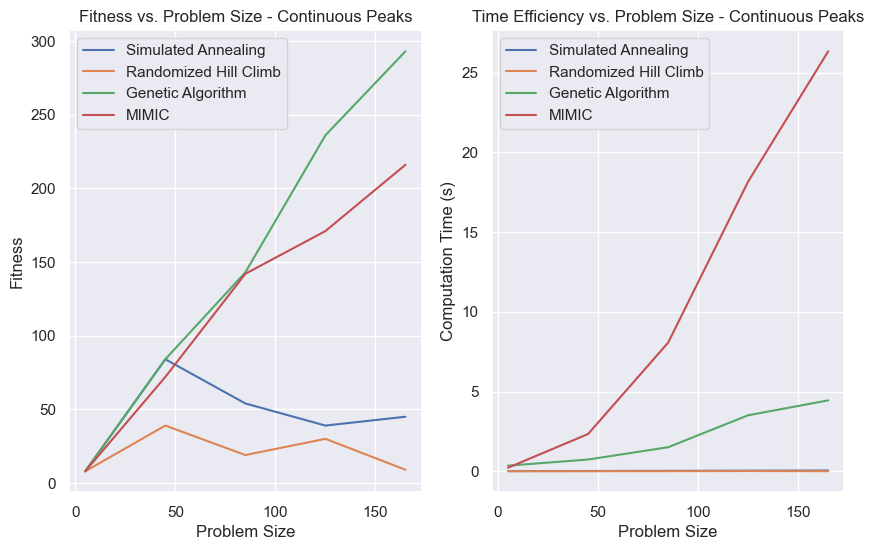

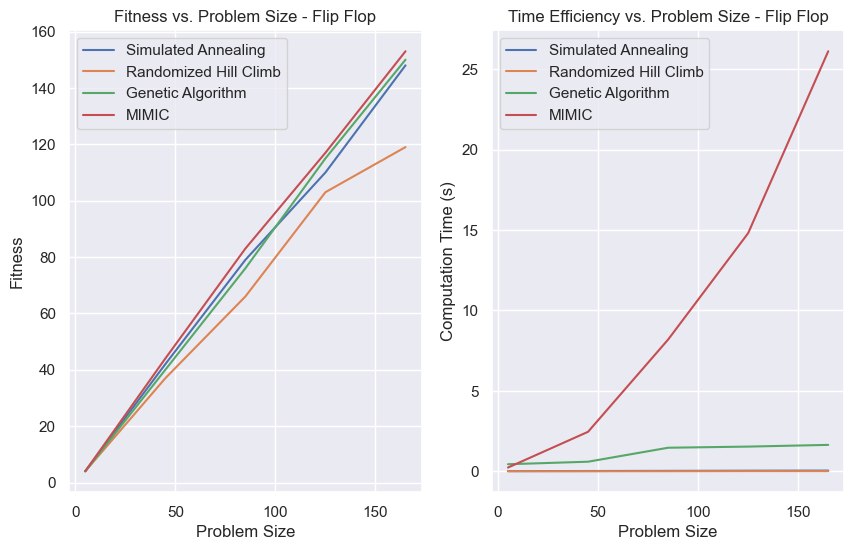

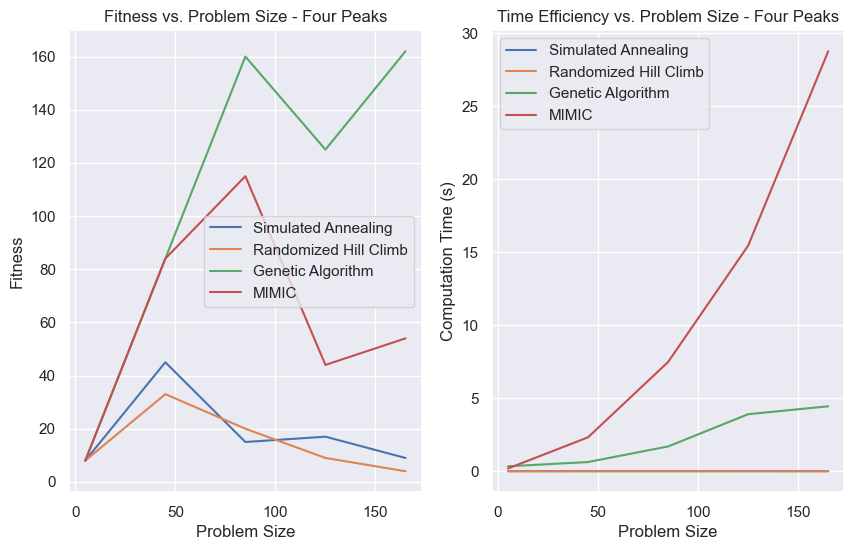

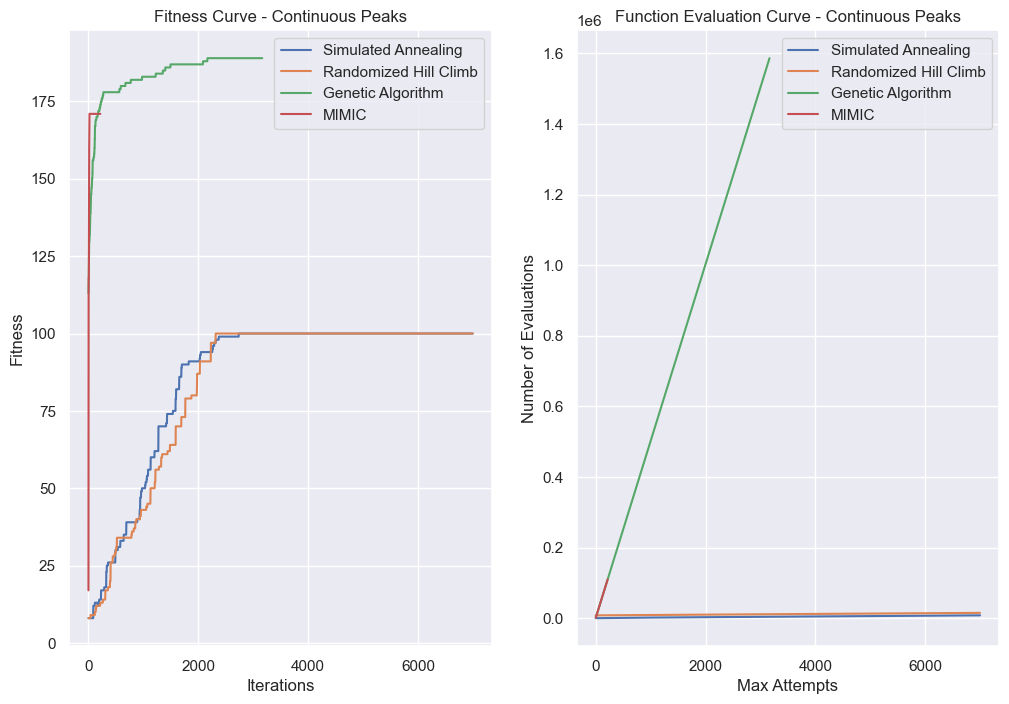

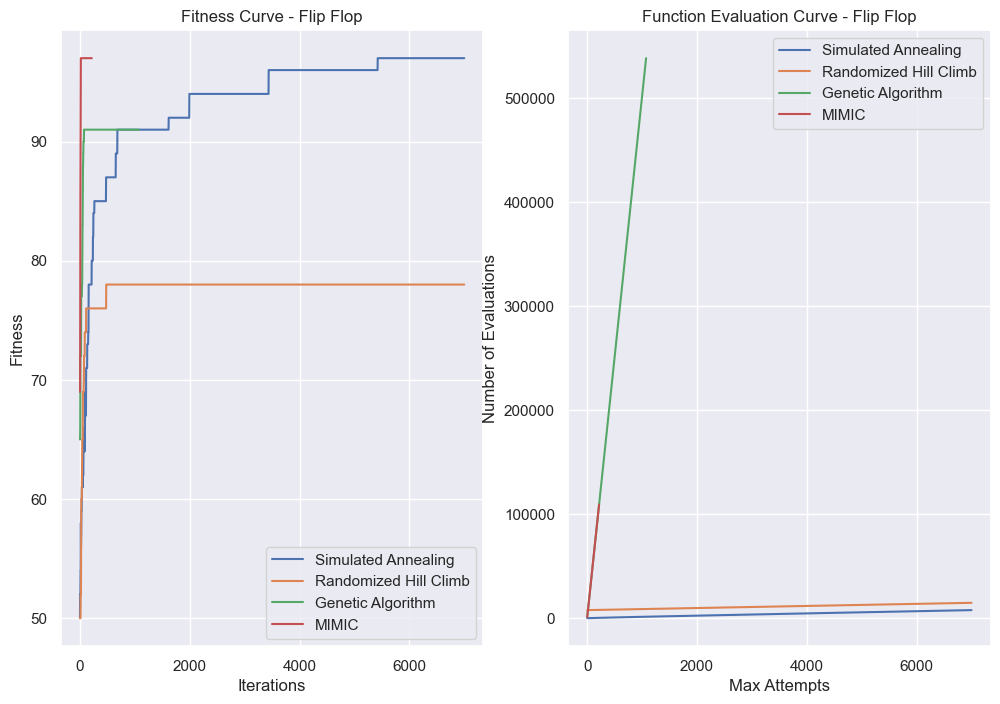

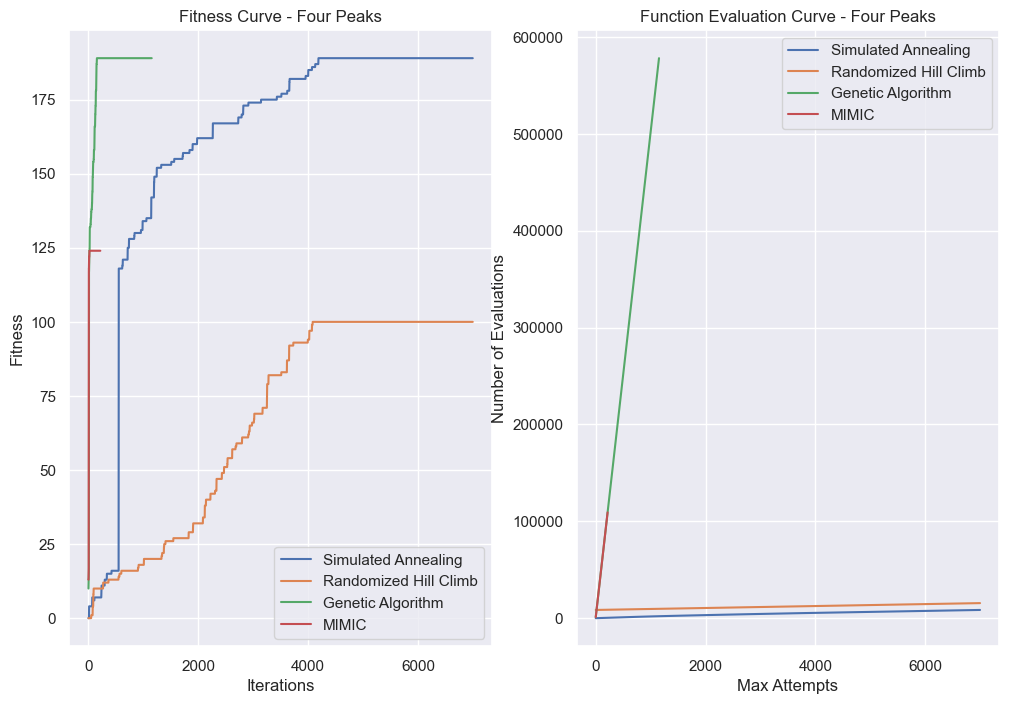

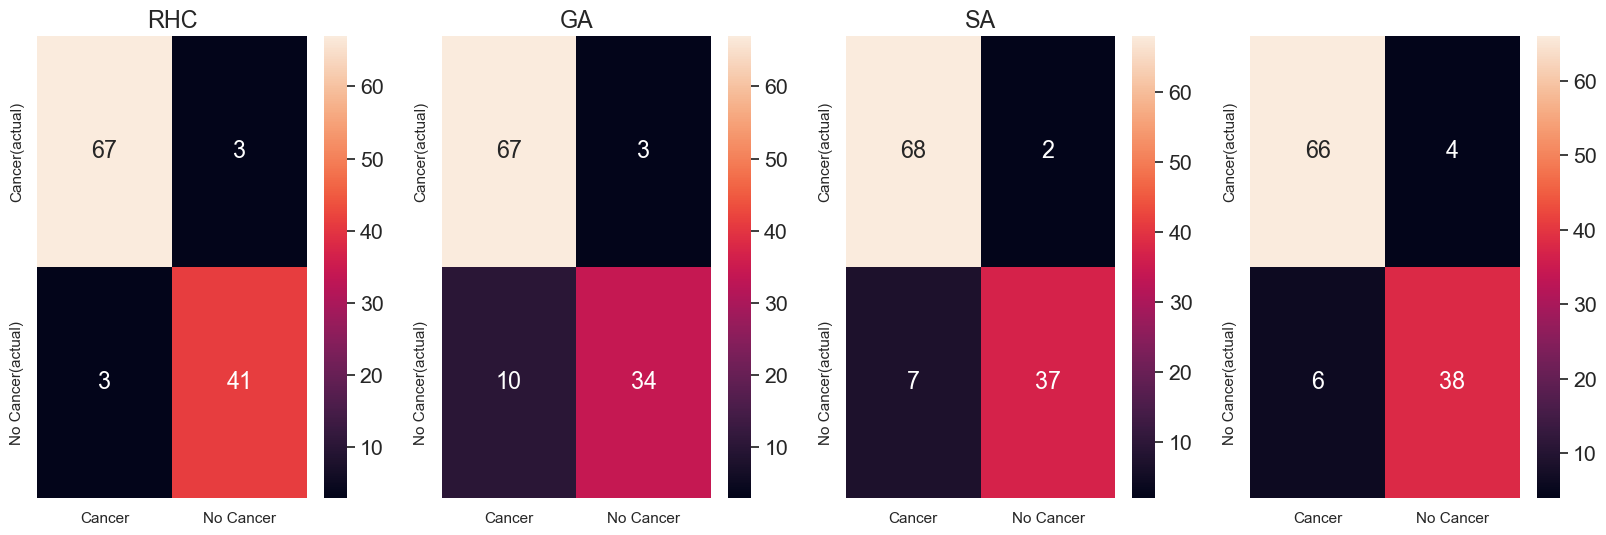

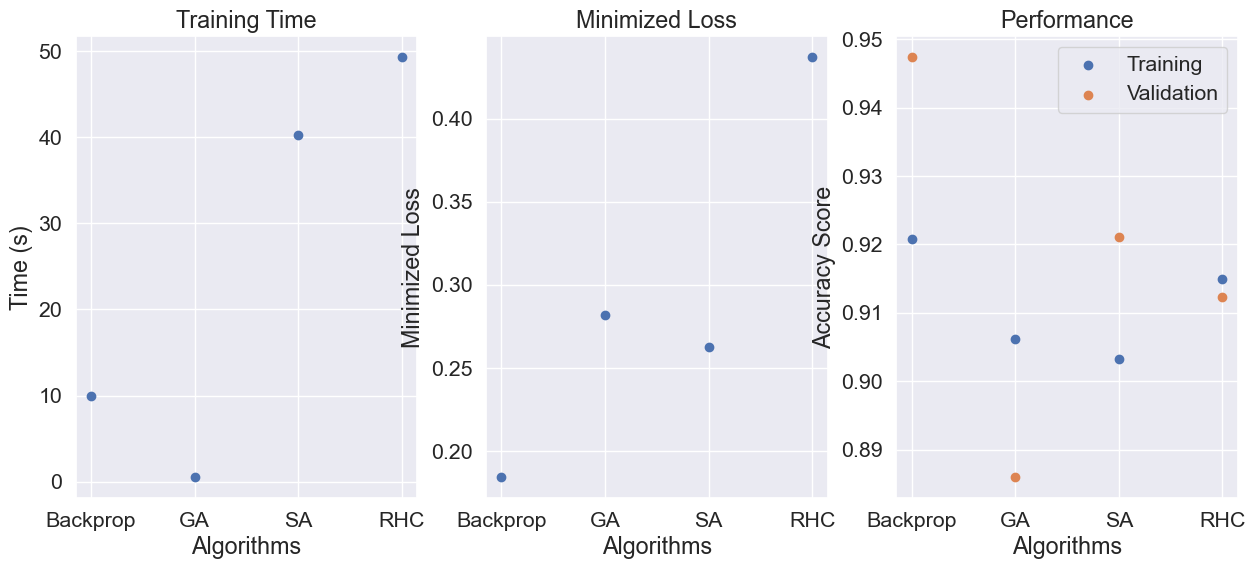

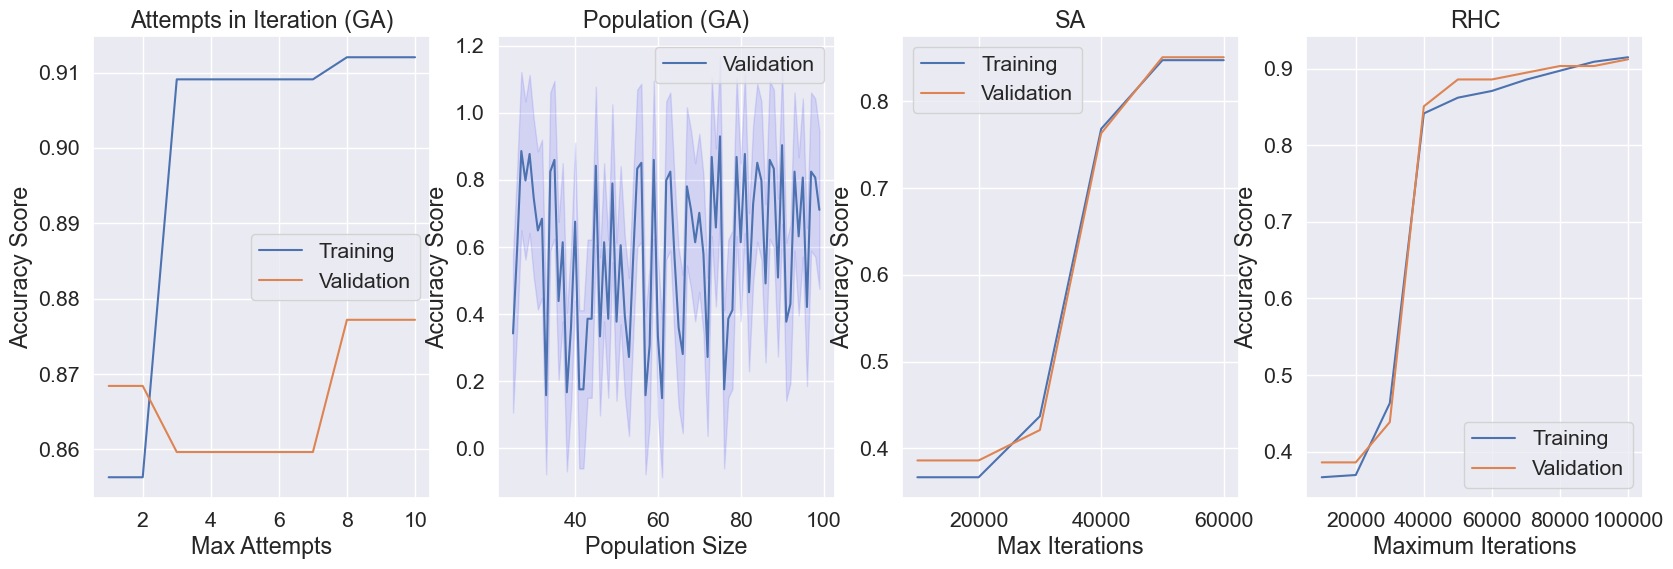

In [23]:
analyze_problem_size_wrapper()
fit_curve_wrapper()
performance_wrapper()
plot_hp()
test_performance()